In [1]:
import os
import sys
sys.path.append('../src/')
import glob
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 150)
pd.set_option("display.max_rows", 101)
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
sns.set_theme()
import cca_functions

In [2]:
%load_ext autoreload
%autoreload 2

# configurations
- follow the file selection dialog:
    - select microscopy folder in first step
    - select positions of the selected folder in second step
- repeat to add more positions to the analysis
- positions selected within one iteration of the dialog will be pooled together in the following analyses

In [3]:
data_dirs, positions = cca_functions.configuration_dialog()
file_names = [os.path.split(path)[-1] for path in data_dirs]
image_folders = [[os.path.join(data_dir, pos_str, 'Images') for pos_str in pos_list] for pos_list, data_dir in zip(positions, data_dirs)]
# determine available channels based on first(!) position.
# Warn user if one or more of the channels are not available for some positions
first_pos_dir = os.path.join(data_dirs[0], positions[0][0], 'Images')
first_pos_files = os.listdir(first_pos_dir)
channels, warn = cca_functions.find_available_channels(first_pos_files, first_pos_dir)

TypeError: find_available_channels() takes 1 positional argument but 2 were given

In [5]:
first_pos_files

['LSM1_s01_acdc_output.csv',
 'LSM1_s01_act1.tif',
 'LSM1_s01_align_shift.npy',
 'LSM1_s01_cdc10.tif',
 'LSM1_s01_delROIsInfo.npz',
 'LSM1_s01_last_tracked_i.txt',
 'LSM1_s01_metadata.csv',
 'LSM1_s01_phase_contr.tif',
 'LSM1_s01_segm.npz',
 'LSM1_s01_segmInfo.csv']

In [6]:
channels, warn

(['act1', 'cdc10', 'phase_contr'], False)

# load data and perform all needed calculations on image data

In [11]:
overall_df = cca_functions.calculate_downstream_data(
    file_names,
    image_folders,
    positions,
    channels, 
    force_recalculation=True)

Load files for Multi_3D_zStacks, Position_1...
Number of cells in position: 17
Number of annotated frames in position: 1
Calculate regionprops on each frame based on Segmentation...
> c:\users\mairhoermann\documents\phd-code\yeast_acdc\src\cca_functions.py(78)calculate_downstream_data()
     76                 print(f'Calculate regionprops on each frame based on Segmentation...')
     77                 import pdb; pdb.set_trace()
---> 78                 rp_df = _calculate_rp_df(seg_mask[:cc_data.frame_i.max()+1])
     79                 print(f'Calculate mean signal strength for every channel and cell...')
     80                 flu_signal_df = _calculate_flu_signal(seg_mask, channel_data, channels, cc_data)

ipdb> q


BdbQuit: 

In [18]:
import pdb; pdb.pm()

> c:\users\mairhoermann\anaconda3\envs\acdc2\lib\site-packages\pandas\core\groupby\grouper.py(860)get_grouper()
    858                 in_axis, level, gpr = False, gpr, None
    859             else:
--> 860                 raise KeyError(gpr)
    861         elif isinstance(gpr, Grouper) and gpr.key is not None:
    862             # Add key to exclusions

ipdb> u
> c:\users\mairhoermann\anaconda3\envs\acdc2\lib\site-packages\pandas\core\groupby\groupby.py(888)__init__()
    886             from pandas.core.groupby.grouper import get_grouper
    887 
--> 888             grouper, exclusions, obj = get_grouper(
    889                 obj,
    890                 keys,

ipdb> u
> c:\users\mairhoermann\anaconda3\envs\acdc2\lib\site-packages\pandas\core\frame.py(7626)groupby()
   7624         # error: Argument "squeeze" to "DataFrameGroupBy" has incompatible type
   7625         # "Union[bool, NoDefault]"; expected "bool"
-> 7626         return DataFrameGroupBy(
   7627             obj=s

In [8]:
overall_df

,frame_i,time_seconds,Cell_ID,is_cell_dead,is_cell_excluded,x_centroid,y_centroid,editIDclicked_x,editIDclicked_y,editIDnewID,cell_cycle_stage,generation_num,relative_ID,relationship,emerg_frame_i,division_frame_i,is_history_known,corrected_assignment,cell_area_pxl,cell_vol_vox,cell_area_um2,cell_vol_fl,gui_mCitrine_mean,gui_phase_contr_mean,gui_mCitrine_median,gui_phase_contr_median,gui_mCitrine_min,gui_phase_contr_min,gui_mCitrine_max,gui_phase_contr_max,gui_mCitrine_sum,gui_phase_contr_sum,gui_mCitrine_q25,gui_phase_contr_q25,gui_mCitrine_q75,gui_phase_contr_q75,gui_mCitrine_q05,gui_phase_contr_q05,gui_mCitrine_q95,gui_phase_contr_q95,gui_mCitrine_amount_autoBkgr,gui_phase_contr_amount_autoBkgr,gui_mCitrine_amount_dataPrepBkgr,gui_phase_contr_amount_dataPrepBkgr,area,convex_area,filled_area,major_axis_length,minor_axis_length,orientation,perimeter,centroid_y,centroid_x,solidity,2d_label_count,min_t,max_t,lifespan,age,frames_till_gone,elongation,mCitrine_corrected_mean,phase_contr_corrected_mean,mCitrine_corrected_amount,mCitrine_corrected_concentration,phase_contr_corrected_amount,phase_contr_corrected_concentration,max_frame_pos,file,selection_subset,position,directory,guimCitrine_mean,guiphase_contr_mean,guimCitrine_median,guiphase_contr_median,guimCitrine_min,guiphase_contr_min,guimCitrine_max,guiphase_contr_max,guimCitrine_sum,guiphase_contr_sum,guimCitrine_q25,guiphase_contr_q25,guimCitrine_q75,guiphase_contr_q75,guimCitrine_q05,guiphase_contr_q05,guimCitrine_q95,guiphase_contr_q95,guimCitrine_amount_autoBkgr,guiphase_contr_amount_autoBkgr,guimCitrine_amount_dataPrepBkgr,guiphase_contr_amount_dataPrepBkgr
0,0,0.0,1,False,False,135,67,NaN,NaN,-1,S,2,2,mother,-1,-1,False,False,603.0,10292.289017,31.071987,120.389759,909.257048,846.603648,293.0,733.0,75.0,325.0,5976.0,2605.0,548282.0,510502.0,138.00,617.50,994.00,924.50,96.10,494.1,4286.60,1698.70,505469.0,80563.0,0.0,0.0,603,618,603,30.091981,25.540135,0.765917,90.083261,67.145937,135.452736,0.975728,1.0,0,240,241,1,240,1.178223,838.257048,133.603648,505469.0,4198.604638,80563.0,669.184827,240,MIA_KC_test_files,0,Position_2,../data/raw_files/MIA_KC_test_files\Position_2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0.0,2,False,False,152,61,NaN,NaN,-1,S,0,1,bud,-1,-1,False,False,74.0,453.764370,3.813146,5.307719,91.283784,689.540541,91.0,675.0,61.0,277.0,133.0,2051.0,6755.0,51026.0,80.25,442.00,100.50,803.75,66.65,364.2,115.35,1118.15,1501.0,-1736.0,0.0,0.0,74,75,74,10.045466,9.436897,-0.623899,29.556349,61.000000,152.270270,0.986667,1.0,0,32,33,1,32,1.064488,20.283784,0.000000,1501.0,282.795653,0.0,0.000000,240,MIA_KC_test_files,0,Position_2,../data/raw_files/MIA_KC_test_files\Position_2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,180.0,1,False,False,135,66,NaN,NaN,-1,S,2,2,mother,-1,-1,False,False,612.0,10444.698129,31.535748,122.172501,918.785948,853.233660,243.5,747.5,88.0,384.0,6526.0,2568.0,562297.0,522179.0,150.00,623.00,841.75,922.00,110.55,482.1,4631.15,1773.30,518233.0,93779.0,0.0,0.0,612,622,612,30.469725,25.583949,0.720247,89.840620,66.723856,135.220588,0.983923,1.0,0,240,241,2,239,1.190970,846.785948,153.233660,518233.0,4241.813797,93779.0,767.594993,240,MIA_KC_test_files,0,Position_2,../data/raw_files/MIA_KC_test_files\Position_2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,180.0,2,False,False,152,60,NaN,NaN,-1,S,0,1,bud,-1,-1,False,False,75.0,456.054187,3.864675,5.334504,98.320000,682.133333,96.0,642.0,64.0,316.0,144.0,1679.0,7374.0,51160.0,87.50,474.50,110.50,827.00,70.40,367.3,124.30,1180.70,1974.0,-1340.0,0.0,0.0,75,78,75,10.353643,9.257172,-0.530731,30.142136,60.333333,152.080000,0.961538,1.0,0,32,33,2,31,1.118446,26.320000,0.000000,1974.0,370.043798,0.0,0.000000,240,MIA_KC_test_files,0,Position_2,../data/raw_files/MIA_KC_test_files\Position_2...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [68]:
# Join on Cell_ID vs. relative_ID to later calculate columns like "daughter growth" or "mother-bud-signal-combined"
overall_df_rel = overall_df.copy()
overall_df = overall_df.merge(
    overall_df_rel,
    how='left',
    left_on=['frame_i', 'relative_ID', 'max_frame_pos', 'file', 'selection_subset', 'position', 'directory'],
    right_on=['frame_i', 'Cell_ID', 'max_frame_pos', 'file', 'selection_subset', 'position', 'directory'],
    suffixes = ('', '_rel')
)
overall_df['mCitrine_combined_amount_mother_bud'] = overall_df.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
overall_df['combined_mother_bud_volume'] = overall_df.apply(
    lambda x: x.loc['cell_vol_fl']+x.loc['cell_vol_fl_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['cell_vol_fl'],
    axis=1
)

In [69]:
# build dataframe grouped by phases
phase_grouped = overall_df.sort_values(
    'frame_i'
).groupby(
    ['Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
     'max_frame_pos', 'selection_subset', 'max_t']
).agg(
    # perform some calculations relating to the whole phase:
    phase_area_growth=('cell_area_um2', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_volume_growth=('cell_vol_fl', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_area_at_beginning=('cell_area_um2', 'first'),
    phase_volume_at_beginning=('cell_vol_fl', 'first'),
    phase_volume_at_end=('cell_vol_fl', 'last'),
    phase_daughter_area_growth=('cell_area_um2_rel', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_daughter_volume_growth=('cell_vol_fl_rel', lambda x: x.iloc[-1]-x.iloc[0]),
    phase_length=('frame_i', lambda x: max(x)-min(x)),
    phase_begin = ('frame_i', min),
    phase_end = ('frame_i', max),
    phase_mCitrine_amount_at_beginning = ('mCitrine_corrected_amount', 'first'),
    phase_mCitrine_mean_at_beginning = ('mCitrine_corrected_mean', 'first'),
    phase_mCitrine_concentration_at_beginning = ('mCitrine_corrected_concentration', 'first'),
    phase_mCitrine_amount_comb_end = ('mCitrine_combined_amount_mother_bud', 'last'),
    phase_volume_at_end_combined = (('combined_mother_bud_volume'), 'last')
).reset_index()

# detect complete cell cycle phases and complete cell cycles
temp = np.logical_and(
    phase_grouped.phase_begin > 0,
    phase_grouped.phase_end < phase_grouped.max_frame_pos
)
# this or is for disappearing cells
complete_phase_indices = np.logical_and(
    temp,
    phase_grouped.phase_end < phase_grouped.max_t
)
phase_grouped['complete_phase'] = complete_phase_indices.astype(int)
no_of_compl_phases_per_cycle = phase_grouped.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
)['complete_phase'].transform('sum')
complete_cycle_indices = no_of_compl_phases_per_cycle == 2
phase_grouped['complete_cycle'] = complete_cycle_indices.astype(int)
# append phase-grouped data to overall_df
overall_df = overall_df.merge(
    phase_grouped,
    how='left',
    on=['Cell_ID', 'generation_num', 'cell_cycle_stage', 'relationship', 'position', 'file', 
        'max_frame_pos', 'selection_subset', 'max_t']
)

In [70]:
phase_grouped.sort_values(['position', 'file', 'Cell_ID']).head(15)

,Cell_ID,generation_num,cell_cycle_stage,relationship,position,file,max_frame_pos,selection_subset,max_t,phase_area_growth,phase_volume_growth,phase_area_at_beginning,phase_volume_at_beginning,phase_volume_at_end,phase_daughter_area_growth,phase_daughter_volume_growth,phase_length,phase_begin,phase_end,phase_mCitrine_amount_at_beginning,phase_mCitrine_mean_at_beginning,phase_mCitrine_concentration_at_beginning,phase_mCitrine_amount_comb_end,phase_volume_at_end_combined,complete_phase,complete_cycle
6,1,2,S,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,-4.071,-23.347,34.164,142.151,118.804,15.871,51.293,21,0,21,0.0,0.000,0.000,2419.0,171.082,0,0
13,1,3,G1,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,4.535,26.113,30.351,119.893,146.006,3.556,13.723,12,22,34,2513.0,4.267,20.960,1920.0,146.006,1,1
20,1,3,S,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,-1.649,-10.585,34.370,142.972,132.387,14.737,44.065,32,35,67,2060.0,3.088,14.408,2907.0,176.850,1,1
27,1,4,G1,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,0.412,1.331,33.958,138.823,140.154,1.855,5.642,16,68,84,1521.0,2.308,10.956,1841.0,140.154,1,1
34,1,4,S,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,-0.361,-3.774,33.700,138.923,135.149,19.375,62.741,26,85,111,1509.0,2.307,10.862,2518.0,198.866,1,1
41,1,5,G1,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,2.525,15.749,32.979,133.209,148.958,3.401,12.935,16,112,128,2055.0,3.211,15.427,2619.0,148.958,1,1
48,1,5,S,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,-3.813,-23.406,35.194,148.227,124.821,15.716,49.580,24,129,153,1607.0,2.353,10.841,1880.0,176.806,1,1
55,1,6,G1,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,2.010,13.857,32.000,128.784,142.641,4.741,16.454,21,154,175,1900.0,3.060,14.753,2386.0,142.641,1,1
62,1,6,S,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,-0.155,-3.001,33.906,144.173,141.172,14.067,43.178,21,176,197,2483.0,3.774,17.222,2516.0,188.439,1,1
68,1,7,G1,mother,Position_1,MIA_KC_test_files_flu_control,240,1,240,2.010,15.411,33.494,137.128,152.539,NaN,NaN,32,198,230,2098.0,3.228,15.300,1959.0,152.539,1,0


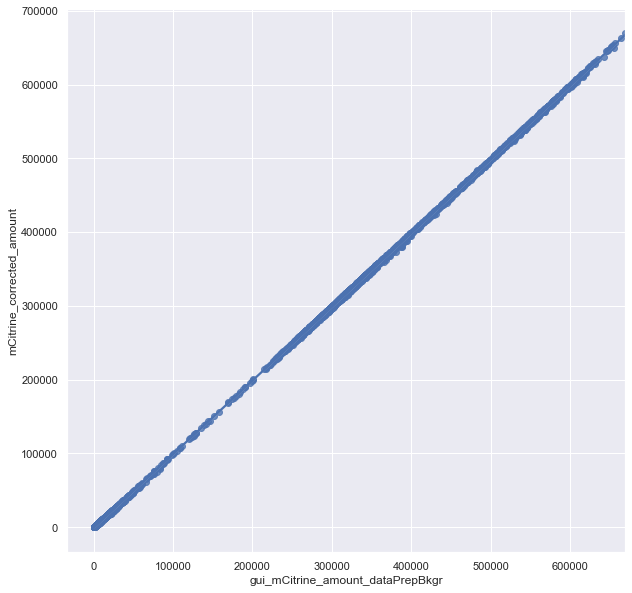

In [76]:
plt.figure(figsize=(10,10))
sns.regplot(
    data=overall_df[overall_df.gui_mCitrine_amount_dataPrepBkgr>0],
    x='gui_mCitrine_amount_dataPrepBkgr',
    y='mCitrine_corrected_amount'
)

# Plots for ACDC paper

## Flurescence Signal over time (centered on bud emergence)

In [54]:
# some configurations
# frame interval of video
frame_interval_minutes = 3
# quantiles of complete cell cycles (wrt phase lengths) to exclude from analysis 
# (keep this for potential later use)
down_q, upper_q = 0, 1
# minimum number of cell cycles contributing to the mean+CI curve:
min_no_of_ccs = 10
# determine if you want to split the plot by generation
split_by_gen = True
# wether to scale to 0/1 or not
scale_data = True

In [55]:
# select needed cols from overall_df to not end up with too many columns
needed_cols = [
    'selection_subset', 'position', 'Cell_ID', 'cell_cycle_stage', 'generation_num', 'frame_i',
    'mCitrine_corrected_amount', 'mCitrine_corrected_amount_rel', 
    'file', 'relationship', 'relative_ID', 'phase_length', 'phase_begin', 'gui_mCitrine_amount_autoBkgr'
]
filter_idx = np.logical_and(overall_df['complete_cycle'] == 1, overall_df.selection_subset==0)
plot_data6 = overall_df.loc[filter_idx, needed_cols].copy()
# calculate the time the cell already spent in the current frame at the current timepoint
plot_data6['frames_in_phase'] = plot_data6['frame_i'] - plot_data6['phase_begin'] + 1
# calculate the time to the next (for G1 cells) and from the last (for S cells) G1/S transition  
plot_data6['centered_frames_in_phase'] = plot_data6.apply(
    lambda x: x.loc['frames_in_phase'] if\
    x.loc['cell_cycle_stage']=='S' else\
    x.loc['frames_in_phase']-1-x.loc['phase_length'],
    axis=1
)
# calculate combined signal and the "Pool, Phase ID" for the legend
# plot_data6 at this point only contains relationship==mother, 
# as generation_num==0 and relationship==bud are filtered out (incomplete cycle, cycles start with G1)
plot_data6['Combined Signal M&B'] = plot_data6.apply(
    lambda x: x.loc['mCitrine_corrected_amount']+x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else\
    x.loc['mCitrine_corrected_amount'],
    axis=1
)
plot_data6['Bud Signal'] = plot_data6.apply(
    lambda x: x.loc['mCitrine_corrected_amount_rel'] if\
    x.loc['cell_cycle_stage']=='S' and x.loc['relationship'] == 'mother' else 0,
    axis=1
)
if scale_data:
    maximum = max(
        plot_data6['Combined Signal M&B'].max(), 
        plot_data6['Bud Signal'].max()
    )
    plot_data6['Combined Signal M&B'] /= maximum
    plot_data6['Bud Signal'] /= maximum

plot_data6['min_centered_frames'] = plot_data6.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'min'
)
plot_data6['max_centered_frames'] = plot_data6.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
)['centered_frames_in_phase'].transform(
    'max'
)

min_and_max = plot_data6.groupby(
    ['Cell_ID', 'generation_num', 'position', 'file']
).agg(
    min_centered = ('min_centered_frames', 'first'),
    max_centered = ('max_centered_frames', 'first')
).reset_index()

min_val, max_val = np.quantile(
    min_and_max.min_centered, down_q
) * frame_interval_minutes, np.quantile(
    min_and_max.max_centered, upper_q
) * frame_interval_minutes

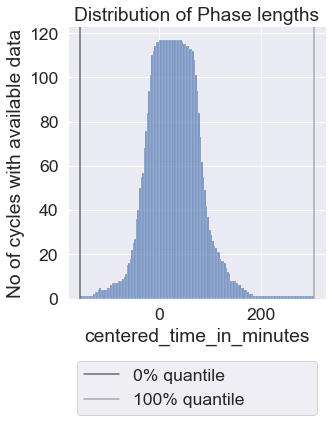

(5262, 21)
(5262, 22)
(4913, 23)


In [56]:
# plot histogram of min and max centered times
plot_data6['centered_time_in_minutes'] = plot_data6.centered_frames_in_phase * frame_interval_minutes
sns.displot(
    height=5,
    data=plot_data6,
    x='centered_time_in_minutes',
    bins=len(plot_data6.centered_frames_in_phase.unique())
)
plt.title('Distribution of Phase lengths')
plt.axvline(x=min_val, color='dimgray', label=f'{down_q*100}% quantile')
plt.axvline(x=max_val, color='darkgray', label=f'{upper_q*100}% quantile')
plt.legend(mode='expand', bbox_to_anchor=(0., -0.3, 1., 0.102))
plt.ylabel('No of cycles with available data')
plt.show()

# selection of ccs by percentiles not in use if min_q and max_q are 0 and 1 respectively
selection_indices = np.logical_and(
    plot_data6.min_centered_frames*frame_interval_minutes>=min_val, 
    plot_data6.max_centered_frames*frame_interval_minutes<=max_val
)
print(plot_data6.shape)
plot_data6 = plot_data6[selection_indices]

# filter for number of contributing cell cycles


# group dataframe to calculate sample sizes per generation
standard_grouped = plot_data6.groupby(
    ['position', 'file', 'Cell_ID', 'generation_num']
).agg('count').reset_index()
plot_data6['Generation'] = plot_data6.apply(
    lambda x: f'1st ($n_1$={len(standard_grouped[standard_grouped.generation_num==1])})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={len(standard_grouped[standard_grouped.generation_num>1])})',
    axis=1
)
print(plot_data6.shape)
if split_by_gen:
    g_cols = ['centered_frames_in_phase', 'Generation']
else:
    g_cols = 'centered_frames_in_phase'
plot_data6['contributing_ccs_at_time'] = plot_data6.groupby(g_cols).transform('count')['selection_subset']
plot_data6 = plot_data6[plot_data6.contributing_ccs_at_time >= min_no_of_ccs]
print(plot_data6.shape)

# finally prepare data for plot (use melt for multiple lines)
sample_size = len(standard_grouped)
avg_cell_cycle_length = round(standard_grouped.loc[:,'centered_time_in_minutes'].mean())*frame_interval_minutes
cols_to_plot = ['Bud Signal', 'Combined Signal M&B']
index_cols = [col for col in plot_data6.columns if col not in cols_to_plot]
plot_data6_melted = pd.melt(
    plot_data6, index_cols, var_name='Method of Calculation'
).sort_values('Method of Calculation')

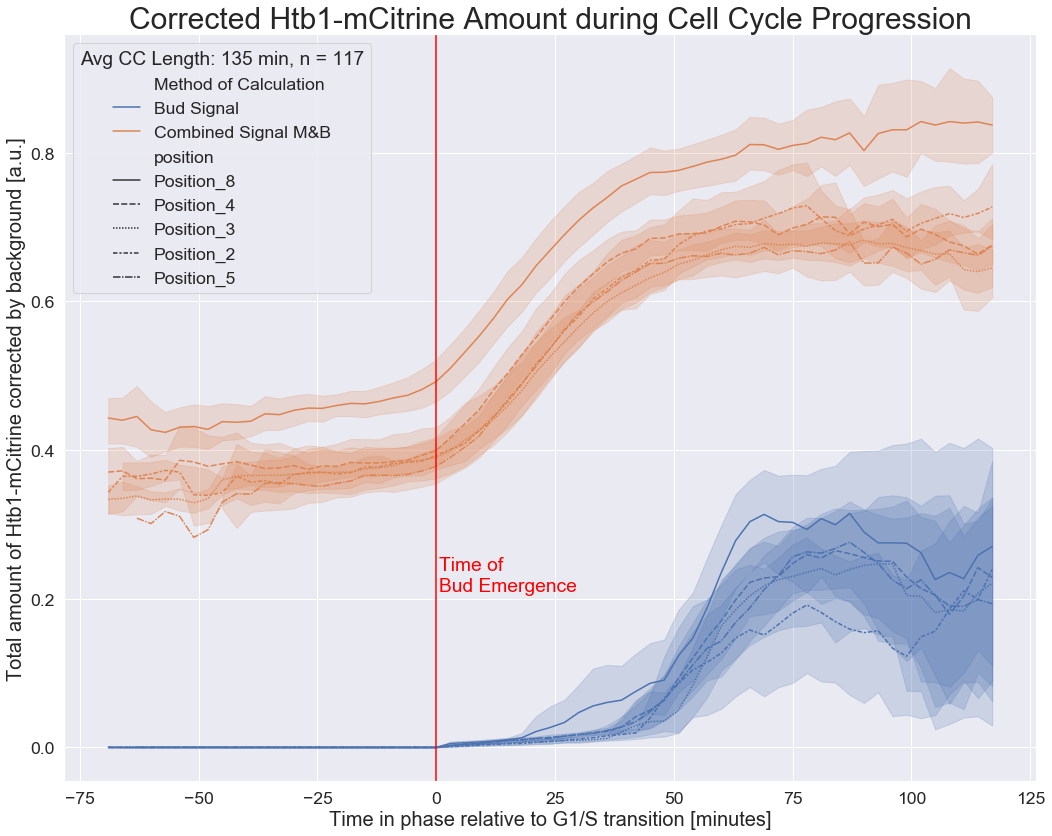

In [59]:
# plot the data, comment out "style" argument to not make difference between generations
sns.set_theme(style="darkgrid", font_scale=1.6)
f, ax = plt.subplots(figsize=(15, 12))
if split_by_gen:
    style='Generation'
else:
    style=None
ax = sns.lineplot(
    data=plot_data6_melted,#.sort_values('Pool, Phase'),
    x="centered_time_in_minutes", 
    y="value",
    hue='Method of Calculation',
    #hue='position',
    #style=style,
    style='position',
    ci=95
)
ax.axvline(x=0, color='red')#, label='Time of Bud Emergence')
ax.text(
    0.5, 0.21, "Time of \nBud Emergence", horizontalalignment='left', 
    size='medium', color='red', weight='normal'
)
#ax.axvline(x=min_val, color='darkgray', label=f'{down_q*100}%-quantile (G1 phase length)')
#ax.axvline(x=max_val, color='dimgray', label=f'{upper_q*100}%-quantile (S phase length)')
ax.legend(
    title=f'Avg CC Length: {avg_cell_cycle_length} min, n = {sample_size}', 
    fancybox=True,
    labelspacing=0.5,
    handlelength=1.5,
    loc = 'upper left'
)
#plt.setp(ax.get_legend().get_title(), fontsize='20') 
ax.set_ylabel("Total amount of Htb1-mCitrine corrected by background [a.u.]", fontsize=20)
ax.set_xlabel("Time in phase relative to G1/S transition [minutes]", fontsize=20)
ax.set_title("Corrected Htb1-mCitrine Amount during Cell Cycle Progression", fontsize=30)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_over_time_by_gen_v4.pdf'),
    dpi=300
)
"""
plt.show()

## Volume at birth and division vs. mCitrine amount at birth (single cell) and division (combined)

In [9]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
needed_cols = [
    'Cell_ID', 'generation_num', 'position', 'file', 'cell_cycle_stage', 'selection_subset', 
    'phase_volume_at_beginning', 'phase_volume_at_end', 'phase_mCitrine_amount_at_beginning',
    'phase_mCitrine_amount_comb_end', 'phase_volume_at_end_combined'
]
plot_data4 = phase_grouped.loc[phase_grouped.complete_cycle==1, needed_cols]
scale_data = False

In [10]:
plot_data4['relevant_volume'] = plot_data4.apply(
    lambda x: x.loc['phase_volume_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_volume_at_end_combined'],
    axis=1
)
plot_data4['relevant_amount'] = plot_data4.apply(
    lambda x: x.loc['phase_mCitrine_amount_at_beginning'] if\
    x.loc['cell_cycle_stage']=='G1' else\
    x.loc['phase_mCitrine_amount_comb_end'],
    axis=1
)
# defining a function to generate entries for the figure legend 
# (assuming that selection_subset>0 is the autofluorescence control of the experiment)
def calc_legend_entry(x):
    if x.loc['selection_subset'] == 0:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Single cell at birth'
        else:
            return 'Combined mother&bud at cytokinesis'
    else:
        if x.loc['cell_cycle_stage']=='G1':
            return 'Af control, single cell at birth'
        else:
            return 'Af control, combined mother&bud at cytokinesis'
        
plot_data4['Kind of Measurement'] = plot_data4.apply(
    lambda x: 'Single Cell in G1 (Frame after Cytokinesis)' if\
    x.loc['cell_cycle_stage']=='G1' else\
    'Combined Mother & Bud in S (Frame before Cytokinesis)',
    axis=1
)
plot_data4['Kind of Measurement new'] = plot_data4.apply(
    calc_legend_entry,
    axis=1
)
plot_data4['Generation'] = plot_data4.apply(
    lambda x: f'1st ($n_1$={int(len(plot_data4[plot_data4.generation_num==1])/2)})' if\
    x.loc['generation_num']==1 else f'2+ ($n_2$={int(len(plot_data4[plot_data4.generation_num>1])/2)})',
    axis=1
)
if scale_data:
    maximum = plot_data4['relevant_amount'].max()
    plot_data4['relevant_amount'] /= maximum
sample_size = len(plot_data4)


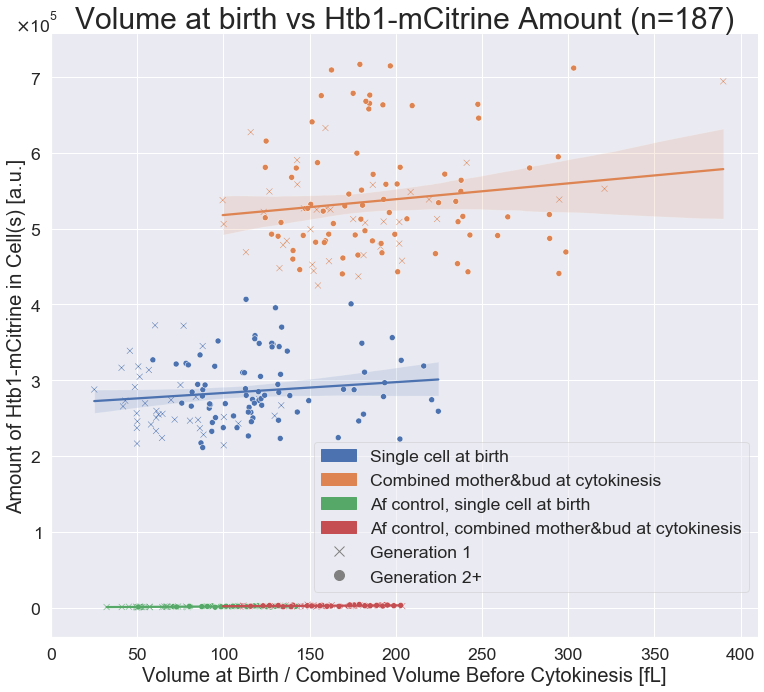

sample size flu-control: 70
sample size tagged strain: 117


In [56]:
#plot_data4 = plot_data4[plot_data4.selection_subset==1]
sns.set_theme(style="darkgrid", font_scale=1.6)
# Initialize the figure
sns.lmplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4.sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    #style="generation_num",
    #row="selection_subset",
    #sharex=False,
    height=10,
    aspect=1.1,
    scatter=False
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4[plot_data4.generation_num==1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='x'
)

sns.scatterplot(
    x="relevant_volume", 
    y="relevant_amount", 
    data=plot_data4[plot_data4.generation_num>1].sort_values(
        'Kind of Measurement new', ascending=False
    ),
    hue="Kind of Measurement new",
    legend=False,
    marker='o'
)

#g._legend.set_title('Kind of Measurement')
ax = plt.gca()
#ax.set(yscale="log2")
#ax.set_yscale('log', basey=2)
#ax.set_xscale('log', basex=10)
labels = [
    'Single cell at birth',
    'Combined mother&bud at cytokinesis',
    'Af control, single cell at birth',
    'Af control, combined mother&bud at cytokinesis',
    'Generation 1',
    'Generation 2+'
]
handles = [
    mpatches.Patch(color=sns.color_palette()[0]),
    mpatches.Patch(color=sns.color_palette()[1]),
    mpatches.Patch(color=sns.color_palette()[2]),
    mpatches.Patch(color=sns.color_palette()[3]),
    mlines.Line2D([], [], color='gray', marker='x', linestyle='None',
                          markersize=10),
    mlines.Line2D([], [], color='gray', marker='o', linestyle='None',
                          markersize=10)
]
ax.legend(
    handles=handles,
    labels=labels, 
    loc='center right',
    bbox_to_anchor = (1,0.2),
    framealpha=0.5
)
ax.set_ylabel("Amount of Htb1-mCitrine in Cell(s) [a.u.]", fontsize=20)
ax.set_xlabel("Volume at Birth / Combined Volume Before Cytokinesis [fL]", fontsize=20)
ax.set_title(f"Volume at birth vs Htb1-mCitrine Amount (n={int(sample_size/2)})", fontsize=30)
# format y-axis
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0), useMathText=True)
ax.get_yaxis().get_offset_text().set_position((-0.05,0))
# format x-axis
ax.set_xlim(0, plot_data4.relevant_volume.max()+20)
plt.tight_layout()
"""
plt.savefig(
    os.path.join('..', 'figures', 'mCitrine_at_birth_and_cytokinesis_v5.pdf'),
    dpi=300
)
"""
plt.show()
print(f'sample size flu-control: {len(plot_data4[plot_data4.selection_subset==1])//2}')
print(f'sample size tagged strain: {len(plot_data4[plot_data4.selection_subset==0])//2}')

# Plot gallery

## (Volume) growth in G1 vs. mother+daughter growth in S (1st generation)

In [ ]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
complete_cc_data = phase_grouped[phase_grouped.all_complete==1]
s_data = complete_cc_data[complete_cc_data.cell_cycle_stage=="S"]
g1_data = complete_cc_data[complete_cc_data.cell_cycle_stage=="G1"]
plot_data2 = g1_data.merge(s_data, on=['Cell_ID', 'generation_num', 'position'], how='inner')
plot_data2 = plot_data2[plot_data2.generation_num==1]
plot_data2['combined_motherbud_growth'] = plot_data2['growth_in_phase_y'] + plot_data2['daughter_area_growth_y']
plot_data2['combined_motherbud_vol_growth'] = plot_data2['volume_growth_in_phase_y'] + plot_data2['daughter_volume_growth_y']

In [ ]:
sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="growth_in_phase_x", y="combined_motherbud_growth", data=plot_data2,
    hue="selection_subset_x", height=10)
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_ylabel("Combined Mother+Bud S growth [pixel area]", fontsize=20)
ax.set_xlabel("G1 growth [pixel area]", fontsize=20)
ax.set_title("G1 growth vs. mother+daughter cell S growth (area)", fontsize=30)
plt.show()

In [ ]:
sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="volume_growth_in_phase_x", y="combined_motherbud_vol_growth", data=plot_data2,
    hue="selection_subset_x", height=10)
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_ylabel("Combined Mother+Bud S volume growth [fl]", fontsize=20)
ax.set_xlabel("G1 volume growth [fl]", fontsize=20)
ax.set_title("G1 growth vs. mother+daughter cell S growth (Volume)", fontsize=30)
plt.show()

## Area and Volume at birth vs. G1 duration (1st generation)

In [107]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
plot_data3 = phase_grouped[phase_grouped.cell_cycle_stage=="G1"]
plot_data3 = plot_data3[plot_data3.incomplete_phase==0]
plot_data3 = plot_data3[plot_data3.generation_num==1]

sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="area_at_beginning", y="phase_length", data=plot_data3,
    hue="selection_subset", height=10)
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_ylabel("Duration of first G1 phase [frames]", fontsize=20)
ax.set_xlabel("Area at birth (first cytokinesis)", fontsize=20)
ax.set_title("Area at birth vs G1 duration (1st generation)", fontsize=30)
plt.show()

KeyError: "['selection_subset', 'area_at_beginning'] not in index"

In [108]:
sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="volume_at_beginning", y="phase_length", data=plot_data3,
    hue="selection_subset", height=10)
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_ylabel("Duration of first G1 phase [frames]", fontsize=20)
ax.set_xlabel("Volume at birth (first cytokinesis) [fL]", fontsize=20)
ax.set_title("Volume at birth vs G1 duration (1st generation)", fontsize=30)
plt.show()

KeyError: "['selection_subset', 'volume_at_beginning'] not in index"

## Area and Volume at birth vs. mCitrine concentration at birth (1st generation)

In [ ]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
plot_data4 = phase_grouped[phase_grouped.cell_cycle_stage=="G1"]
plot_data4 = plot_data4[plot_data4.incomplete_phase==0]
plot_data4 = plot_data4[plot_data4.generation_num==1]

sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="area_at_beginning", y="mCitrine_concentration_at_beginning", data=plot_data4,
    hue="selection_subset", height=10, )
g._legend.set_title('Position Pool')
g.set(yscale="log")
ax = plt.gca()
ax.set_ylabel("mCitrine concentration in cell [a.u.]", fontsize=20)
ax.set_xlabel("Area at birth (first cytokinesis)", fontsize=20)
ax.set_title("Area at birth vs mCitrine concentration (1st generation)", fontsize=30)
plt.show()

In [ ]:
sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="volume_at_beginning", y="mCitrine_concentration_at_beginning", data=plot_data4,
    hue="selection_subset", height=10, )
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_yscale("log")
ax.set_ylabel("mCitrine concentration in cell [a.u.]", fontsize=20)
ax.set_xlabel("Volume at birth (first cytokinesis)", fontsize=20)
ax.set_title("Volume at birth vs mCitrine concentration (1st generation)", fontsize=30)
plt.show()

## G1 vs. S duration (1st generation)

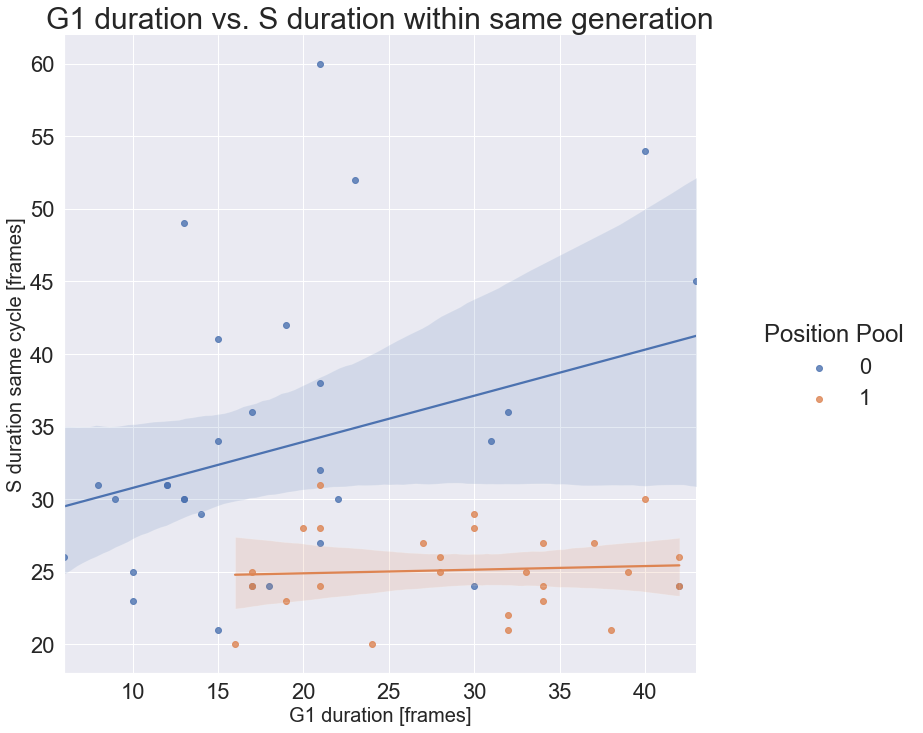

In [31]:
# obtain table where one cell cycle is represented by one row: 
# first set of columns (like phase_length, growth...) for G1, second set of cols for S
complete_cc_data = phase_grouped[phase_grouped.all_complete==1]
s_data = complete_cc_data[complete_cc_data.cell_cycle_stage=="S"]
g1_data = complete_cc_data[complete_cc_data.cell_cycle_stage=="G1"]
plot_data1 = g1_data.merge(s_data, on=['Cell_ID', 'generation_num', 'position', 'file'], how='inner')
plot_data1 = plot_data1[plot_data1.generation_num==1]

sns.set_theme(style="darkgrid", font_scale=2)
# Initialize the figure
g = sns.lmplot(x="phase_length_x", y="phase_length_y", data=plot_data1,
    hue="selection_subset_x", height=10)
g._legend.set_title('Position Pool')
ax = plt.gca()
ax.set_ylabel("S duration same cycle [frames]", fontsize=20)
ax.set_xlabel("G1 duration [frames]", fontsize=20)
ax.set_title("G1 duration vs. S duration within same generation", fontsize=30)
plt.show()

# backup

## Flurescence Signal vs. relative time in phase

In [164]:
needed_cols = [
    'selection_subset', 'position', 'Cell_ID', 'cell_cycle_stage', 'generation_num', 'frame_i',
    'mCitrine_corrected_mean_signal', 'mCitrine_corrected_signal_amount', 'file', 'relationship'
]
plot_data5 = overall_df[needed_cols].copy()
plot_data5['frames_in_phase'] = plot_data5.sort_values(['frame_i'], ascending=True)\
             .groupby(['Cell_ID', 'generation_num', 'cell_cycle_stage', 'position', 'file', 'selection_subset'])\
             .cumcount() + 1

phase_lengths = plot_data5.groupby(
    ['Cell_ID', 'generation_num', 'cell_cycle_stage', 'position', 'selection_subset']
).agg(phase_length=('frame_i', lambda x: max(x)-min(x)+1)).reset_index()
plot_data5 = plot_data5.merge(
    phase_lengths, 
    on=['Cell_ID', 'generation_num', 'cell_cycle_stage', 'position', 'selection_subset'],
    how='left'
)
plot_data5['relative_time_in_phase'] = plot_data5['frames_in_phase']/plot_data5['phase_length']
plot_data5['Pool, Phase, Type'] = plot_data5.apply(
    lambda x: f'Pool {str(x.loc["selection_subset"])}, Phase {x.loc["cell_cycle_stage"]}, Type {x.loc["relationship"]}', axis=1
)

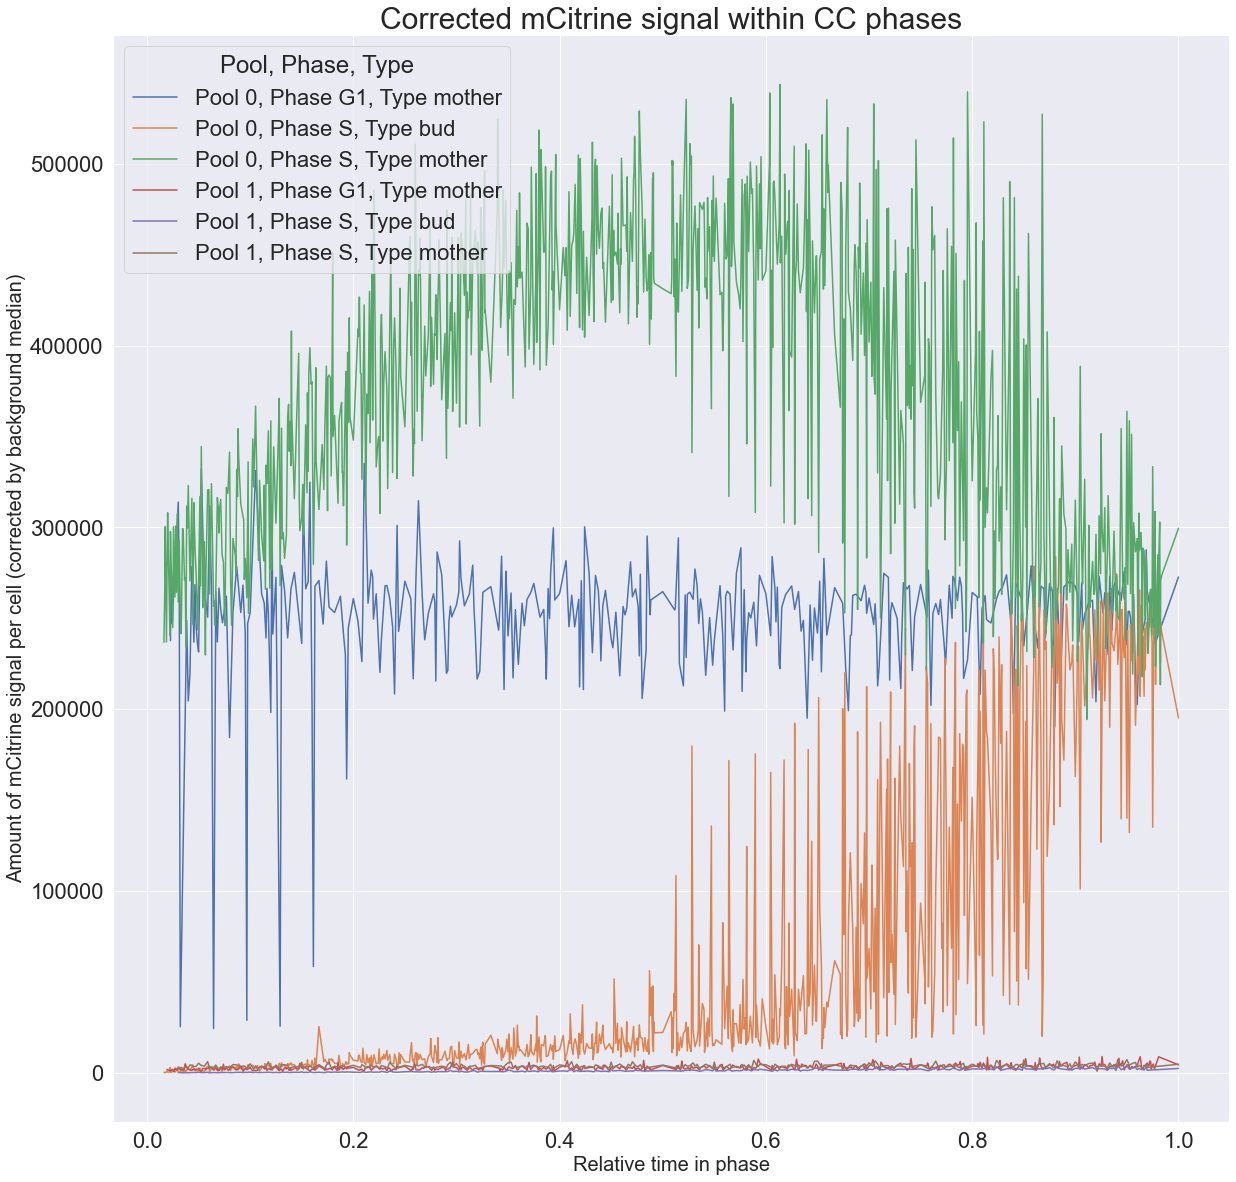

In [165]:
sns.set_theme(style="darkgrid", font_scale=2)
f, ax = plt.subplots(figsize=(20, 20))
sns.lineplot(data=plot_data5.sort_values('Pool, Phase, Type'), x="relative_time_in_phase", y="mCitrine_corrected_signal_amount", 
             hue='Pool, Phase, Type', ci=None)
ax.set_ylabel("Amount of mCitrine signal per cell (corrected by background median)", fontsize=20)
ax.set_xlabel("Relative time in phase", fontsize=20)
ax.set_title("Corrected mCitrine signal within CC phases", fontsize=30)
plt.show()

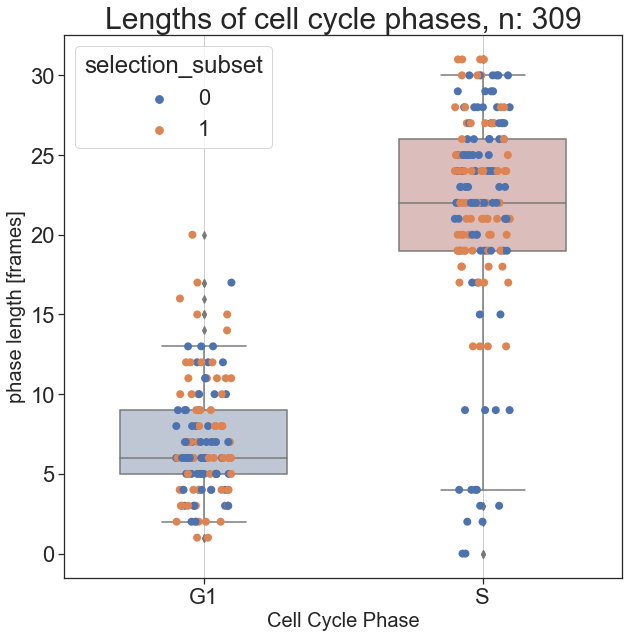

In [69]:
plot_data1 = phase_grouped[~incomplete_phase_indices]
sns.set_theme(style="ticks", font_scale=2)

# Initialize the figure
f, ax = plt.subplots(figsize=(10, 10))
# Plot the orbital period with horizontal boxes
sns.boxplot(x="cell_cycle_stage", y="phase_length", data=plot_data1,
            whis=[5, 95], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="cell_cycle_stage", y="phase_length", data=plot_data1,
              size=8, hue="selection_subset", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set_ylabel("phase length [frames]", fontsize=20)
ax.set_xlabel("Cell Cycle Phase", fontsize=20)
ax.set_title(f"Lengths of cell cycle phases, n: {plot_data1.shape[0]}", fontsize=30)
#sns.despine(trim=True, left=True)
plt.show()

In [144]:
# code for calculating column "phase transition (boolean)"
"""
plot_data3['cell_pos_id'] = plot_data3.apply(lambda x: str(x.loc['Cell_ID'])+'-'+str(x.loc['position']), axis=1)

plot_data3['phase_transition'] = 0
for i in plot_data3.cell_pos_id.unique():
    sc_data = plot_data3.loc[plot_data3.cell_pos_id==i]
    phase_transition_indices = sc_data['cell_cycle_stage'] != sc_data['cell_cycle_stage'].shift(1)
    sc_data.loc[phase_transition_indices, 'phase_transition'] = 1
    plot_data3.loc[plot_data3.cell_pos_id==i] = sc_data
"""

"\nplot_data3['cell_pos_id'] = plot_data3.apply(lambda x: str(x.loc['Cell_ID'])+'-'+str(x.loc['position']), axis=1)\n\nplot_data3['phase_transition'] = 0\nfor i in plot_data3.cell_pos_id.unique():\n    sc_data = plot_data3.loc[plot_data3.cell_pos_id==i]\n    phase_transition_indices = sc_data['cell_cycle_stage'] != sc_data['cell_cycle_stage'].shift(1)\n    sc_data.loc[phase_transition_indices, 'phase_transition'] = 1\n    plot_data3.loc[plot_data3.cell_pos_id==i] = sc_data\n"

### alternatively configure stuff manually

In [24]:
# the path to the data folder containing the MIA_ folders
data_dir = os.path.join('..', 'data', 'nd2_files')
# the MIA_ folder which should be analyzed
mia_dir = 'MIA_F016.nd2'
# the positions which should be incorporated in the analysis
positions = [6]
# channels to incorporate in the Analysis, assuming to be the same for all positions
channels = ['phase_contr', 'mCitrine']